# Proceso selección banregio
---
Creador : Valeria Rojas Linares

### Solicitud del negocio - Objetivo

El área de ventas de la empresa requiere un modelo que lo ayude a predecir el rating de todos los libros que tengan más de 3000 reviews. Ellos han identificado un par de factores que influyen el rating que reciben los libros y deberán ser incluidos en el modelo:

- Días desde el lanzamiento del libro
- Número de libros que ha tenido el autor entre los 50 más vendidos antes de la fecha de lanzamiento
- El archivo contiene información acerca de los 50 libros más vendidos en amazon de 2009 a 2019. 

Tu tarea será construir un modelo que cumpla con los requisitos del negocio y realizar predicciones para algún subset de los datos.

In [1]:
#importar herramientas básicas
#importar pandas para manejo de bd, limpieza, exploracion
import pandas as pd
#pyplot para generar gráficos
import matplotlib.pyplot as plt
%matplotlib inline
#creación de gráficos 
import seaborn as sns

In [2]:
#importar datos
dataset = pd.read_csv("books.csv")
#ver el tipo de datos que contiene cada columna
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Titulo              550 non-null object
Autor               550 non-null object
Rating              550 non-null float64
Reviews             550 non-null int64
Precio              550 non-null int64
FechaLanzamiento    550 non-null object
Genero              550 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 30.2+ KB


### Evaluación del dataset
Como cualquier fuente de datos, necesitamos saber qué tipo de archivo tenemos y si éste requiere alguna modificación. Por ejemplo, datos no válidos o nulos que necesiten ser reemplazados.
Pasos a seguir:
1. Seleccionar dataset con libros que tienen más de 3000 reviews
2. Crear nuevas variables días y número de libros más vendidos
3. Conocer estadísticas básicas del dataset
4. Evaluar si existen datos nulos y corregirlos
5. Relación entre variables

#### 1.  Seleccionar dataset con libros que tienen más de 3000 reviews
Antes de comenzar el análisis, comenzamos con detectar los libros que tienen más de 3000 reviews.

In [3]:
data = dataset[dataset['Reviews']>=3000]

#### 2. Crear nuevas variables

##### a. Dias transcurridos

In [4]:
#Fecha final será el último día de 2019
fecha = '2019-12-31'
fecha = pd.to_datetime(fecha)
# Convertir fecha a formato datetime
data['FechaLanzamiento']= pd.to_datetime(data['FechaLanzamiento'], format="%Y-%m-%d")
#Calcular días transcurridos, restar fecha final a Fecha de Lanzamiento
data['Dias_transcurridos'] = (fecha - data['FechaLanzamiento']).dt.days
data.head()

C:\Users\PipeReds\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\PipeReds\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Titulo,Autor,Rating,Reviews,Precio,FechaLanzamiento,Genero,Dias_transcurridos
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-02-22,Non Fiction,1408
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-10-07,Non Fiction,450
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017-08-26,Fiction,857
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019-12-05,Non Fiction,26
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011-05-10,Fiction,3157


##### b. Número de libros que ha tenido el autor entre los 50 más vendidos antes de la fecha de lanzamiento

Para esta variable, debido a que no tenemos una columna con el número de volúmenes vendidos por autor ni el número de libros vendidos antes de la fecha de lanzamiento, se asumirá la variable como el número de libros por autor dentro de la lista. Esto es, la cuenta total de libros por cada autor y se añadirá como feature o variable al set de datos.

In [5]:
#crear la cuenta total de libros por autor
autor = data['Autor'].value_counts()
autor.head()

Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          10
American Psychological Association    10
Gallup                                 9
Name: Autor, dtype: int64

In [6]:
#unir la cuenta total al dataset original usando map
data['libros_top']= data.Autor.map(data.Autor.value_counts())
data.head()

C:\Users\PipeReds\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Titulo,Autor,Rating,Reviews,Precio,FechaLanzamiento,Genero,Dias_transcurridos,libros_top
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-02-22,Non Fiction,1408,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-10-07,Non Fiction,450,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017-08-26,Fiction,857,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019-12-05,Non Fiction,26,1
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011-05-10,Fiction,3157,2


##### c. Otras variables
Para esta sección, añadiremos el Género como posible variable, ya que queremos evaluar si éste tiene un impacto en el número de Reviews y el rating de cada libro.
En total, 242 libros son género Non Fiction y 222 son Fiction.

In [7]:
data['Genero'].value_counts()

Non Fiction    242
Fiction        222
Name: Genero, dtype: int64

In [8]:
#convertir columna Genero (categórica) a numérica (binaria)
# data["Genero"] = data["Genero"].astype('category')
# data["Genero_bin"] = data["Genero"].cat.codes
# data.head()
data["Genero"] = data["Genero"].astype('category')
data["Genero_bin"] = data["Genero"].cat.codes
data.head()

C:\Users\PipeReds\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\PipeReds\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Titulo,Autor,Rating,Reviews,Precio,FechaLanzamiento,Genero,Dias_transcurridos,libros_top,Genero_bin
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-02-22,Non Fiction,1408,1,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-10-07,Non Fiction,450,1,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017-08-26,Fiction,857,1,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019-12-05,Non Fiction,26,1,1
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011-05-10,Fiction,3157,2,0


El resultado es Género binario, donde 0 es Fiction y 1 es non Fiction.

Otra variable a considerar es la ganancia total que el libro ha generado en el rango de tiempo. Asumiendo que el número de reviews es el total de libros vendidos en el periodo, se calcula la ganancia total para cada uno en porcentaje.

In [9]:
data['Ganancia'] = data['Reviews'] * data['Precio']
data['Ganancia'] = (data['Ganancia']*100) / data.Ganancia.sum()
data.head(2)

C:\Users\PipeReds\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\PipeReds\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Titulo,Autor,Rating,Reviews,Precio,FechaLanzamiento,Genero,Dias_transcurridos,libros_top,Genero_bin,Ganancia
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-02-22,Non Fiction,1408,1,1,0.181248
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-10-07,Non Fiction,450,1,1,0.371748


#### 2. Estadísticas básicas del dataset

In [10]:
data.describe()

,Rating,Reviews,Precio,Dias_transcurridos,libros_top,Genero_bin,Ganancia
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,4.631681,13866.564655,12.875000,2385.183190,4.219828,0.521552,0.215517
std,0.229302,11816.033325,10.914625,4879.238943,3.048768,0.500074,0.233477
min,3.300000,3014.000000,0.000000,10.000000,1.000000,0.000000,0.000000
25%,4.500000,5797.000000,7.000000,881.750000,2.000000,0.000000,0.074343
50%,4.700000,9652.500000,10.500000,1819.500000,3.000000,1.000000,0.127618
75%,4.800000,19576.000000,15.000000,2818.000000,6.000000,1.000000,0.266952
max,4.900000,87841.000000,105.000000,43828.000000,12.000000,1.000000,1.867361


Hasta ahora sabemos que son 550 features en nuestro archivo. La variable "Rating" tiene una media de 4.6 y no existen valores menores de 3.3 ni mayores de 5. 
Para la variable 'Reviews', los valores están muy polarizados; algunos libros tienen más de 80mil reseñas, mientras que otros tienen apenas 37.

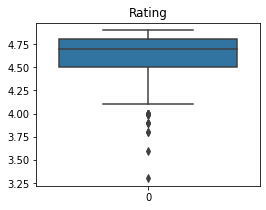

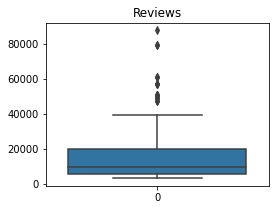

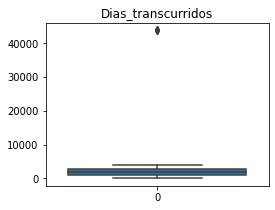

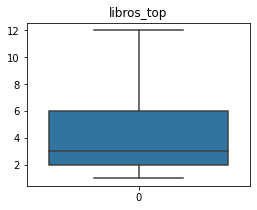

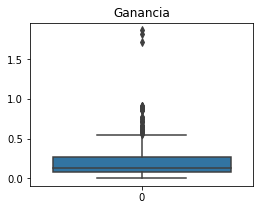

In [23]:
#seleccionar variables numéricas menos Géneros
data_num = data.drop(['Titulo', 'Autor', 'Genero', 'FechaLanzamiento', 'Genero', 'Genero_bin', 'Precio'], axis=1)

#plotear las columnas en data_num formato boxplot
for i in data_num.columns:
    plt.figure(figsize=(4,3))
    plt.title(i)
    sns.boxplot(data=data[i])

De manera más visual, las gráficas anteriores nos permiten observar la distribución de las variables en cuestión. Con relación a la variable "Rating", la gráfica nos deja ver que el 50% de los libros tienen un rating mayor a 4.6 y el 75% del total de los libros tienen un rating entre 4.4 y 4.8.

Para Review (que para nuestro estudio son libros vendidos) se observa que el 75% de nuestro dataset tiene aproximadamente 20,000 reviews. Por lo que con este gráfico también se comprueba que el total de Reviews en parte refleja los libros más vendidos.

En cuanto a Ganancia, el 75% de  los libros (348 libros) tienen en porcentaje .25% de la ganancia total del periodo. En otras palabras, el 75% de los libros generan un 87% de la ganancia total.

Finalmente, en la variable de días trancurridos, la mayor parte de los libros vendidos tienen menos de 10,000 días de venta en el mercado (tomando como día final el último día del 2019).

#### 3. Evaluar si existen datos nulos

En este dataset no hay valores faltantes o nulos, por lo que no es necesaria ninguna imputación de datos.

In [12]:
#checar valores nulos
data.isnull().sum(axis=0)

Titulo                0
Autor                 0
Rating                0
Reviews               0
Precio                0
FechaLanzamiento      0
Genero                0
Dias_transcurridos    0
libros_top            0
Genero_bin            0
Ganancia              0
dtype: int64

#### 4. ¿Existe correlación entre las variables?
Aunque el cliente ha seleccionado las variables que considera tienen un mayor impacto en el rating de un libro, a continuación creamos un correlograma que nos permite ver cuál es la relación entre variables. Este método, junto con los diagramas de dispersión (scatter plots), permiten observar de manera más visual la relación que existe entre las variables. 

Recordemos que existe correlación positiva si al aumentar una variable explicatoria también aumenta la variable a predecir (rating). Por ejemplo, el género Ficción tiene un impacto positivo (0.28) en el review de un libro. La correlación es negativa si al disminuir una variable independiente, también disminuye la variable dependiente (rating), tal es el caso de Rating y Precio. Esto se interpreta como una relación en la que si el precio del libro disminuye (-0.13), también disminuirá el Rating.

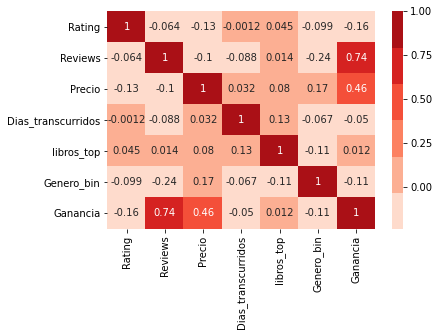

In [13]:
#crear correlograma con valores anotados
sns.heatmap(data.corr(), cmap = sns.color_palette("Reds"), annot=True)

Para finalizar, se muestra la relación entre variables (gráficos de dispersión), así como la distribución de cada una a través de un histograma (gráfico de barra). De esta forma y de un solo vistazo podemos observar la relación y/o no relación que nuestras variables presentan. Por ejemplo, el precio guarda una relación negativa con Reviews, al disminuir el precio también disminuyen los reviews. Aunque la variable ganancia está correlacionada con Reviews y precio, es principalmente porque es el producto de ambas variables (es dependiente de este cálculo), por lo que existe colinearidad entre ellas. Por ello, la variable precio no estará dentro del modelo predictivo.

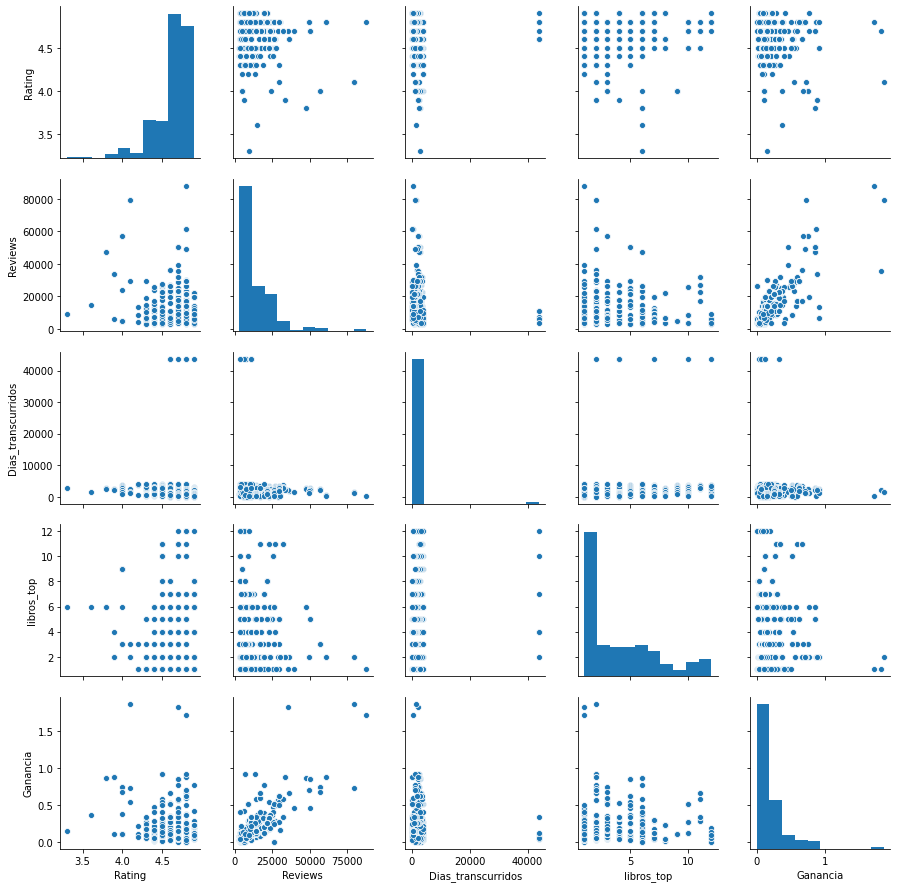

In [14]:
sns.pairplot(data[["Rating", "Reviews", 'Dias_transcurridos','libros_top', "Ganancia"]])

Con los gráficos superiores, es más clara la relación entre la variable Ganancia con Rating y Reviews. En ambos casos se observa una relación positiva, entre mayor ganancia tiene un libro, éste tendrá más reviews.

### Evaluación de un modelo predictivo
Para crear un modelo que sea capaz de predecir el rating de un libro tomando como variables independientes 'Review', 'Dias' y 'Precio', se seguirán los siguientes pasos:
1. Normalización del dataset
2. Dividir el dataset en set prueba y set de entrenamiento
3. Crear y evaluar un modelo predictivo

#### 1-2. Normalización del dataset y dividir en prueba y entrenamiento
En la evaluación previa se destacó que las variables Reviews y días transcurridos tienen valores polarizados, por lo que se recomienda que todas las variables tengan la misma dimensión. Por ello, el dataset tendrá que ser normalizado, esto es tendrán valores entre 0 y 1. 

In [15]:
#extraer los features o variables para el modelo
# la variable y (o variable dependiente) será el rating
y = data['Rating']
#Las variables independientes o que ayudarán a explicar el rating
X = data[[ 'Reviews','Dias_transcurridos','Genero_bin','libros_top','Ganancia']]

In [16]:
#importar el normalizador de sklearn
from sklearn.preprocessing import MinMaxScaler
#importar herramienta para dividir el dataset
from sklearn.model_selection import train_test_split
#crear el objeto
scaler = MinMaxScaler()
#dividimos el dataset en set de entrenamiento y de prueba. Usar ratio de 80% entrenamiento 15% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.15)
#usamos fit para generar los valores max y min que necesita el escalado y transform para escalar el set
X_train_scaled = scaler.fit_transform(X_train)
# #transformar el set de prueba
X_test_scaled = scaler.transform(X_test)

In [17]:
#verificar número de items para cada set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(394, 5)
(70, 5)
(394,)
(70,)


#### 3. Crear y evaluar un modelo de predicción

In [18]:
#importar el modelo, en este caso regresion lineal.
from sklearn.linear_model import LinearRegression
# ajustar(fit) los datos de entrenamiento al modelo
model = LinearRegression().fit(X_train_scaled, y_train)
#Generar los resultados
#Extraer el r-cuadrado (r-squared) como medida de exactitud
print('R-squared en set de training: {:.3f}'
     .format(model.score(X_train_scaled, y_train)))
#Comparar r cuadrada con el set de pruebas
print('R-squared en set de test: {:.3f}'
     .format(model.score(X_test_scaled, y_test)))

R-squared en set de training: 0.039
R-squared en set de test: 0.051


In [19]:
#extraer los coeficientes de regresión del modelo
coeficientes = pd.DataFrame(model.coef_)
coeficientes = coeficientes.T
coeficientes.columns = ['Reviews', 'Días_transcurridos','Genero_bin','Libros_top','Ganacia']
coeficientes.head()

,Reviews,Días_transcurridos,Genero_bin,Libros_top,Ganacia
0,0.072869,-0.056523,-0.051124,0.01199,-0.383631


##### Interpretación.
Los coeficientes del modelo indican la relación (positiva o negativa) que guardan las variables independientes con el rating, que es nuestra variable dependiente. Así, tenemos que si los reviews aumentan, también aumenta el rating. Sobre las variables sugeridas por el cliente, el número total de libros que el autor tiene en los top 50 tiene un impacto positivo en el rating, esto es, entre más libros tiene el autor en el top 50, el rating del libro tenderá a ser mayor.
La segunda variable propuesta por el cliente, días transcurridos desde su lanzamiento, tiene un impacto negativo en el Rating. Esto es, entre menos días transcurridos tiene un libro, su raiting será menor.

Por otro lado, la ganancia tiene un impacto positivo en el rating. De tal forma que, si la ganancia del libro disminuye, también bajará el rating de un libro.

Para modelos de regresión se toma como medida de exactitud la r-cuadrada o r-squared, que nos indica qué tanta explicación puede dar nuestro modelo al problema planteado, en este caso la predicción del rating. Para este modelo, ambos scores son bajos, lo que se debe en cierta parte a la cantidad de datos con los que entrenó nuestro modelo (394 datos). Si se cambia el porcentaje de datos de entrenamiento y los datos de test o el tamaño del set, se corre el riesgo de que el modelo aprenda muy bien esos datos (overfitting) pero el score no sea bueno probando con el set de test.
En los resultados actuales, el modelo tiene un mejor ajuste (aunque mínimo) para el set de entrenamiento.

##### Comparar las predicciones

Finalmente, aunque ya tenemos un score de qué tan bueno es nuestro modelo para predecir el rating de un libro, la tabla siguiente muestra los valores actuales contra la predicción. Así, se observa que en algunos casos la predicción que generó el modelo tiene de 2 a 3 decimales de diferencia con los valores reales, y en otros casos (como en la línea 3) la predicción está muy cercana a los valores actuales.

In [20]:
#Extraer predicciones
predictions = model.predict(X_test_scaled)
#comparar la predicción contra valores actuales
compare_df = pd.DataFrame({'Actual': y_test, 'Predicción': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,Actual,Predicción
0,4.8,4.530774
1,4.8,4.712527
2,4.7,4.582962
3,4.6,4.681731
4,4.8,4.681148
...,...,...
65,4.9,4.689876
66,4.7,4.620739
67,4.7,4.542198
68,4.0,4.631341


### Consideraciones finales
Para construir este modelo partimos de los requerimentos del cliente que eran agregar dos variables que se consideran tienen el mayor impacto para el rating de un libro. Adicionalmente, en nuestro modelo agregamos el Género como posible variable explicatoria del rating además de la Ganancia medida en porcentaje del total. Sin embargo, el r-cuadrado como score del modelo nos indicó que nuestra propuesta solo puede explicar un 0.03% la variabilidad en el rating de un libro.
Es por ello que sería bueno tener acceso a más datos que pudieran mejorar el ajuste del modelo y tener acceso al "Sentimiento" del review. Esto es, clasificar los reviews de acuerdo a si son positivos o negativos, ya que se asume que si un libro tiene más reviews positivos su rating debería ser mejor que aquéllos otros libros con más reviews negativos.

Otras variables que sería bueno tener sería el número de páginas y otras características físicas del libro como tipo de pasta, impresión color o blanco y negro y determinar si el libro es físico o electrónico. Sin embargo, la adición de nuevas variables significa una posibilidad de generar un modelo con un mejor ajuste, pero no siempre tiene el impacto deseado en el modelo.
